**<h1 style="text-align: center;">Predição de preços de imóveis na Califórnia</h1>**


----------------------------------------------------------------

<img title="a title" alt="Alt text" src="https://i0.wp.com/calmatters.org/wp-content/uploads/2022/03/housing.jpg?fit=2263%2C1325&ssl=1">

Neste projeto, vamos utilizar técnicas de regressão linear com a biblioteca **scikit-learn** do **Python** para prever os preços de casas na Califórnia. O objetivo é entender quais características de uma casa (como número de quartos, área construída, localização etc.) influenciam o seu valor de mercado.

Para começarmos, é importante destacar que o conjunto de dados utilizado foi retirado do Kaggle e é referente ao **censo de 1990**. Utilizaremos técnicas de limpeza e pré-processamento dos dados para que eles estejam prontos para a análise.

Em seguida, vamos utilizar a **regressão linear** para modelar a relação entre as características da casa e o seu preço de mercado. Para avaliar a qualidade do modelo, vamos utilizar métricas como **R²** e **RMSE**.

Por fim, vamos analisar os resultados e entender quais características têm mais influência no preço de mercado das casas na Califórnia. Isso pode ser útil para profissionais do mercado imobiliário, investidores e até mesmo para pessoas que estão em busca de uma casa para comprar.

É importante salientar que, mesmo que o modelo seja baseado em dados históricos, ele pode ser útil para a tomada de decisão atual. Porém, é preciso estar ciente de que **há variáveis não contempladas no modelo, como a conjuntura econômica e política atual, que podem impactar nos preços das casas**.

## **Descrição dos dados**
#### Como está estruturado nosso *dataset* e quais são as variáveis?
----------------------------------------------------------------

O *dataset* que utilizaremos possui as seguintes variáveis:

- **Longitude**: longitude de um determinado conjunto de casas.
- **Latitude**: latitude de um determinado conjunto de casas.
- **Housing median age**: idade mediana das casas.
- **Total rooms**: total de quartos.
- **Total bedrooms**: total de quartos para dormir.
- **Population**: população da localidade.
- **Households**: número total de famílias, grupos de pessoas residindo em uma unidades domiciliar, por um quarteirão.
- **Median income**: renda mediana da localidade.
- **Ocean proximity**: Proximidade com o oceano (menos de uma hora para chegar no oceano; terrestre; perto do oceano; perto de uma baía; em uma ilha).

## **Importação das bibliotecas e declaração de funções**
--------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif, SelectKBest
from sklearn.decomposition import PCA

In [2]:
# conjunto de funções para facilitar análise de dados nulos e duplicados

def has_na(df: pd.DataFrame):
    return df.isna().sum()
def has_dupl(df: pd.DataFrame):
    return df.duplicated().sum()
def check_df(df: pd.DataFrame):
    print(f"[*] Checking for NA: \n{has_na(df)} \n\n[*] Duplicated: {has_dupl(df)}")

def get_na(df :pd.DataFrame): return df[df.isnull().any(axis=1)]

## **Entendendo os dados**
#### Tipos das variáveis e estatística descritiva
----------------------------------------------------------------

In [3]:
housing = pd.read_csv('housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing.columns = housing.columns.str.replace('latitude', 'lat')
housing.columns = housing.columns.str.replace('longitude', 'lon')

In [5]:
check_df(housing)

[*] Checking for NA: 
lon                     0
lat                     0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64 

[*] Duplicated: 0


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lon                 20640 non-null  float64
 1   lat                 20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Aqui é possível perceber que a maioria das *features* iniciais são numéricas. Somente a proximidade com o oceano é um atributo categórico.

In [7]:
num_features = housing.select_dtypes('number')
cat_features = housing.drop(columns=num_features)

print(f'Variáveis numéricas: \n {num_features.columns.values}\n')
print(f'Variáveis categóricas: \n {cat_features.columns.values}')

Variáveis numéricas: 
 ['lon' 'lat' 'housing_median_age' 'total_rooms' 'total_bedrooms'
 'population' 'households' 'median_income' 'median_house_value']

Variáveis categóricas: 
 ['ocean_proximity']


In [8]:
housing.nunique().sort_values()

ocean_proximity           5
housing_median_age       52
lon                     844
lat                     862
households             1815
total_bedrooms         1923
median_house_value     3842
population             3888
total_rooms            5926
median_income         12928
dtype: int64

Não existe nenhumma coluna binária.

In [9]:
max_age = housing.housing_median_age.max()
min_age = housing.housing_median_age.min()

print(f"As idades medianas dos imóveis (das construções) estão entre {min_age} e {max_age} anos")

As idades medianas dos imóveis (das construções) estão entre 1.0 e 52.0 anos


In [10]:
max_value = housing.median_house_value.max()
min_value = housing.median_house_value.min()

print(f"Os preços medianos dos imóveis estão entre {min_value} e {max_value}")

Os preços medianos dos imóveis estão entre 14999.0 e 500001.0


In [11]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Resumo sobre as variáveis quantitativas:

In [13]:
housing.describe().drop(columns=['lon', 'lat']).T

,count,mean,std,min,25%,50%,75%,max
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Maiores valores medianos:

In [14]:
housing.median_house_value.nlargest(10)

89     500001.0
459    500001.0
493    500001.0
494    500001.0
509    500001.0
510    500001.0
511    500001.0
512    500001.0
514    500001.0
517    500001.0
Name: median_house_value, dtype: float64

Maiores rendas:

In [15]:
housing.median_income.nlargest(10)

1566    15.0001
4352    15.0001
4604    15.0001
4605    15.0001
4606    15.0001
4626    15.0001
4678    15.0001
5242    15.0001
5247    15.0001
5248    15.0001
Name: median_income, dtype: float64

Aqui podemos perceber que provavelmente esses dois dados em um escala pré-determinada, isso vai ser importante para que no futuro o algoritmo não aprenda erroneamente que existe um limite.

In [16]:
housing.query(f"median_income in {housing.median_income.nsmallest(3).to_list()} or population in {housing.population.nlargest(3).to_list()}")

,lon,lat,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY
3249,-119.99,36.09,23.0,333.0,92.0,198.0,55.0,0.4999,100000.0,INLAND
3258,-122.89,39.42,16.0,411.0,114.0,26.0,19.0,0.4999,73500.0,INLAND
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN
5213,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,90600.0,<1H OCEAN
6343,-117.75,34.06,52.0,62.0,9.0,44.0,16.0,0.4999,112500.0,INLAND
6688,-118.08,34.15,28.0,238.0,58.0,142.0,31.0,0.4999,500001.0,INLAND
7125,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,162500.0,<1H OCEAN
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


Podemos ver que há lugares em que o preço mediano é bem alto mas a renda é baixa.

In [17]:
housing.nsmallest(4, 'total_rooms')

,lon,lat,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN


## **Análise exploratória (EDA)**
#### Analisando, investigando os dados e descrevendo suas principais características.
----------------------------------------------------------------

### Análise univariada

#### *Features* numéricas

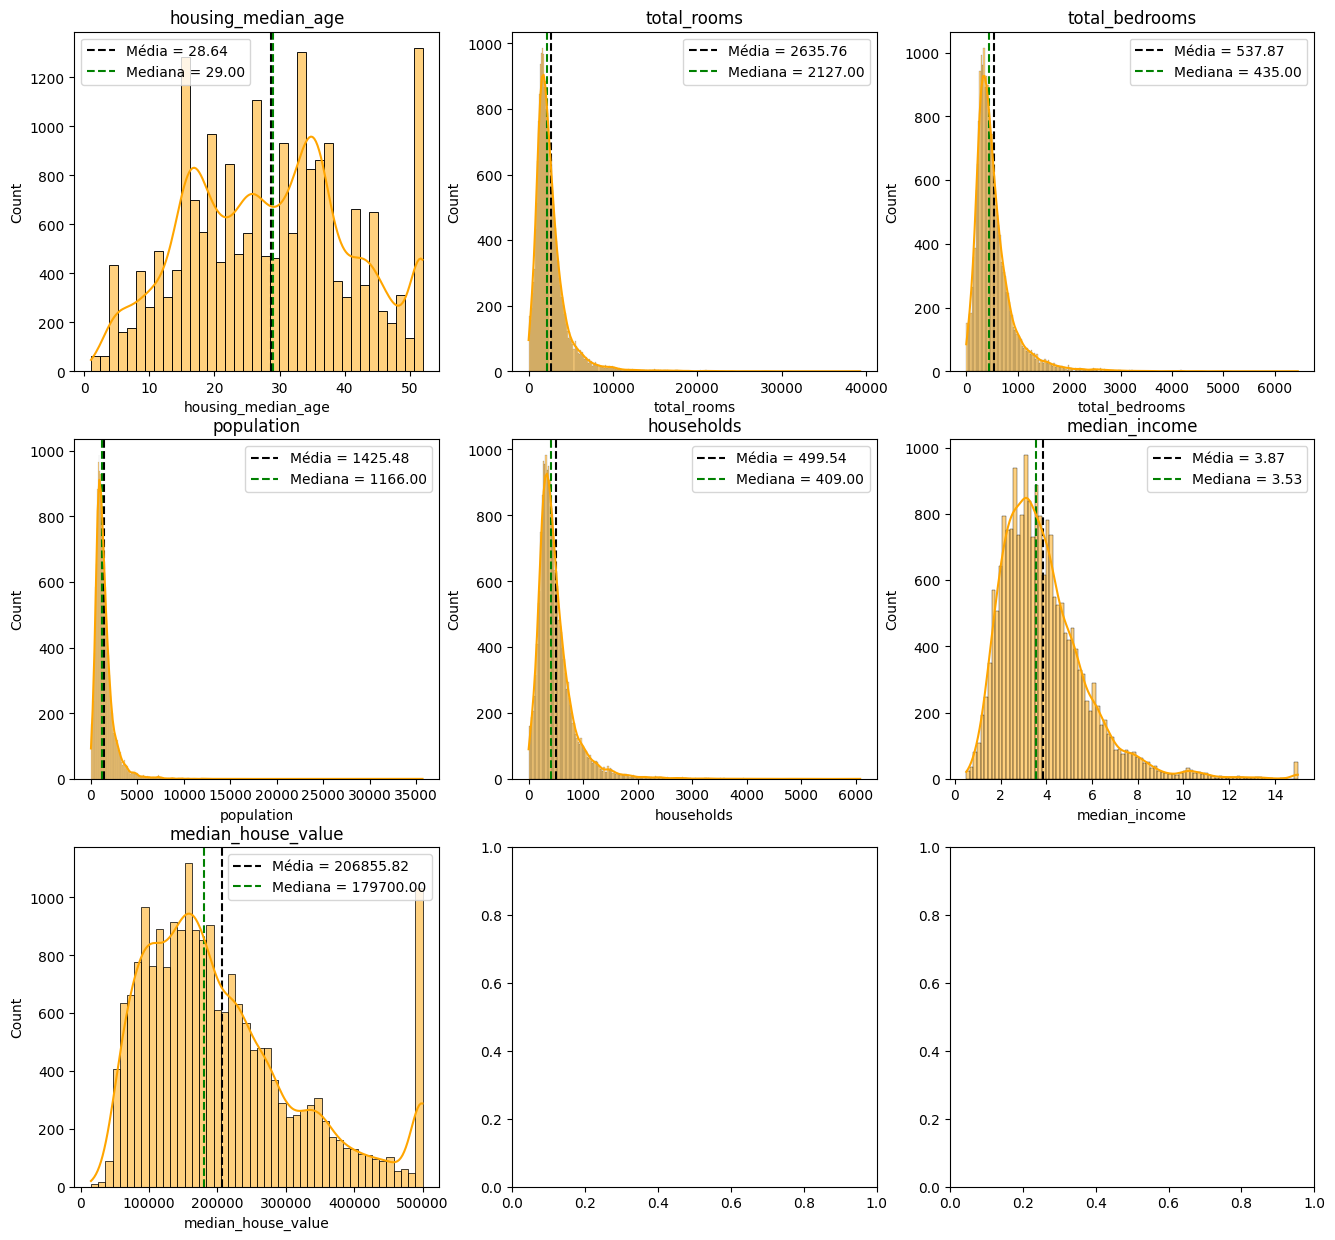

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 15))
axes = axes.flatten()

for i, column in enumerate(num_features.drop(columns=['lat', 'lon'])):
    mean_val = housing[column].mean()
    median_val = housing[column].median()
    axes[i].axvline(mean_val, color='black', linestyle='--', label=f'Média = {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Mediana = {median_val:.2f}')

    axes[i].legend()


    sns.histplot(data=housing,x=column, ax=axes[i], kde=True, color='orange')
    axes[i].set_title(column)

#### *Feature* categórica

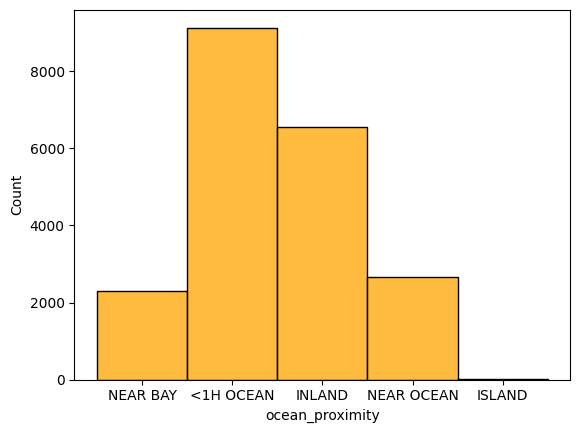

In [19]:
_ = sns.histplot(data=cat_features, x='ocean_proximity', color='orange')

### Análise multivariada

In [20]:
housing.columns

Index(['lon', 'lat', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

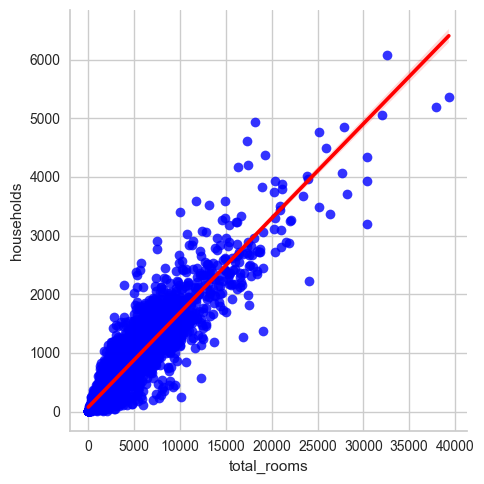

In [284]:
_ = sns.lmplot(data=housing, x='total_rooms', y='households', scatter_kws={"color": "blue", "edgecolor":"k"},
           line_kws={"color": "red"})
_ = plt.title()

Aparentemente há uma relação bem forte entre lares e o total de quartos.

#### Será que quanto mais perto do mar, mais antiga a habitação?

In [285]:
housing.groupby("ocean_proximity").housing_median_age.agg(mean_median_age='mean', median_median_age='median', std_median_age = 'std', max_median_age = 'max', min_median_age = 'min').reset_index().sort_values(by='mean_median_age')

,ocean_proximity,mean_median_age,median_median_age,std_median_age,max_median_age,min_median_age
1,INLAND,24.271867,23.0,12.018020,52.0,1.0
0,<1H OCEAN,29.279225,30.0,11.644453,52.0,2.0
4,NEAR OCEAN,29.347254,29.0,11.840371,52.0,2.0
3,NEAR BAY,37.730131,39.0,13.070385,52.0,2.0
2,ISLAND,42.400000,52.0,13.164346,52.0,27.0


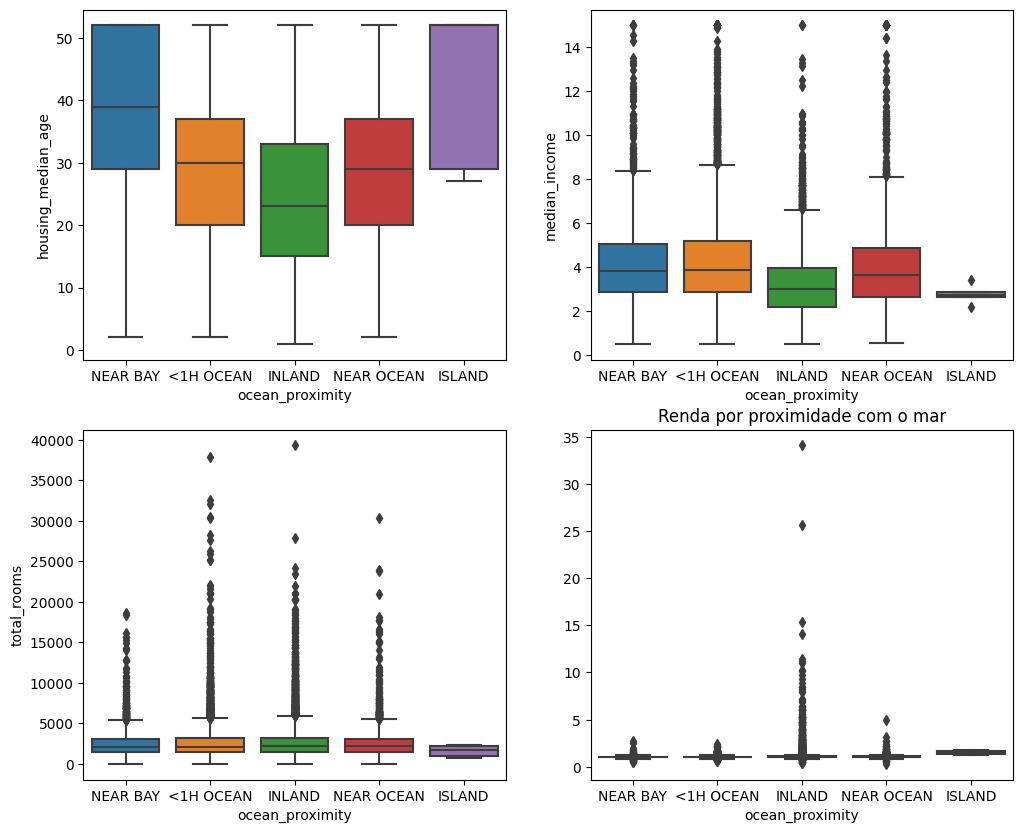

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

_ = sns.boxplot(data=housing, x='ocean_proximity', y='housing_median_age', ax=axes[0])
_ = sns.boxplot(data=housing, x='ocean_proximity', y='median_income', ax=axes[1])
_ = sns.boxplot(data=housing, x='ocean_proximity', y='total_rooms', ax=axes[2])
_ = sns.boxplot(data=housing, x='ocean_proximity', y=housing.total_bedrooms/housing.households, ax=axes[3])
_= plt.title('Renda por proximidade com o mar')

#### Onde estão as concentrações de imóveis?

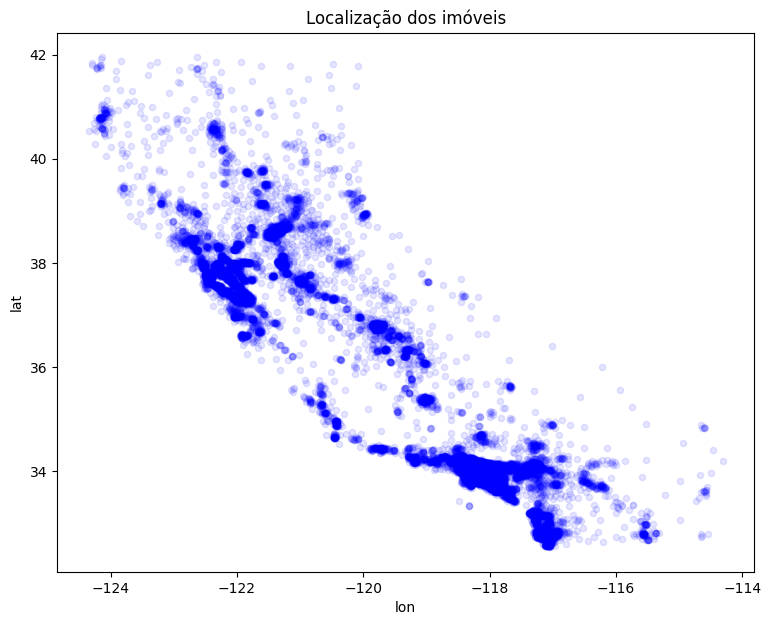

In [21]:
_ = housing.plot(kind="scatter", x="lon", y="lat", alpha=0.1, figsize=(9, 7), c='blue')
_ = plt.title('Localização dos imóveis')

Claramente os imóveis estão mais concentrados no litoral.

#### Será que casas mais velhas estão no litoral também?

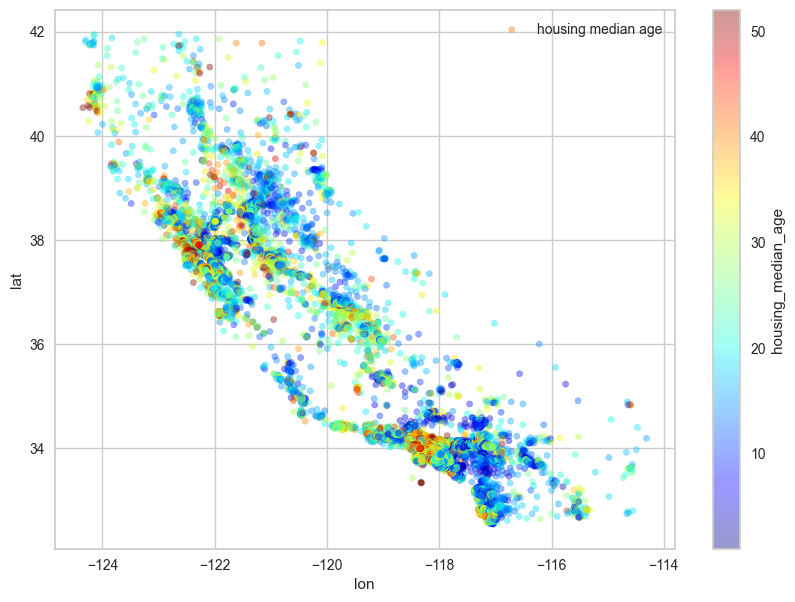

In [288]:
_ = housing.plot(kind="scatter", x="lon", y="lat", alpha=0.4, label="housing median age", figsize=(10,7), 
        c="housing_median_age", cmap=plt.get_cmap("jet"), colorbar=True)
_ = plt.legend()

Pode se dizer que sim, imóveis mais antigos são os construídos primeiro. Se parar para refletir é muito comum as primeiras construções se situarem no litoral.

In [289]:
housing.groupby('ocean_proximity').agg(
    {'median_house_value': ['mean', 'median', 'std', 'sum'],
     'population': ['mean', 'median', 'std', 'sum']}
)

median_house_value                                         \
                              mean    median            std           sum   
ocean_proximity                                                             
<1H OCEAN            240084.285464  214850.0  106124.292213  2.193410e+09   
INLAND               124805.392001  108500.0   70007.908494  8.176001e+08   
ISLAND               380440.000000  414700.0   80559.561816  1.902200e+06   
NEAR BAY             259212.311790  233800.0  122818.537064  5.935962e+08   
NEAR OCEAN           249433.977427  229450.0  122477.145927  6.629955e+08   

                  population                                   
                        mean  median          std         sum  
ocean_proximity                                                
<1H OCEAN        1520.290499  1247.0  1185.848357  13889374.0  
INLAND           1391.046252  1124.0  1168.670126   9112744.0  
ISLAND            668.000000   733.0   301.691067      3340.0  
NEAR BAY         1230.317467  1033.5   885.899035   2817427.0  
NEAR OCEAN       1354.008653  1136.5  1005.563166   3598955.0

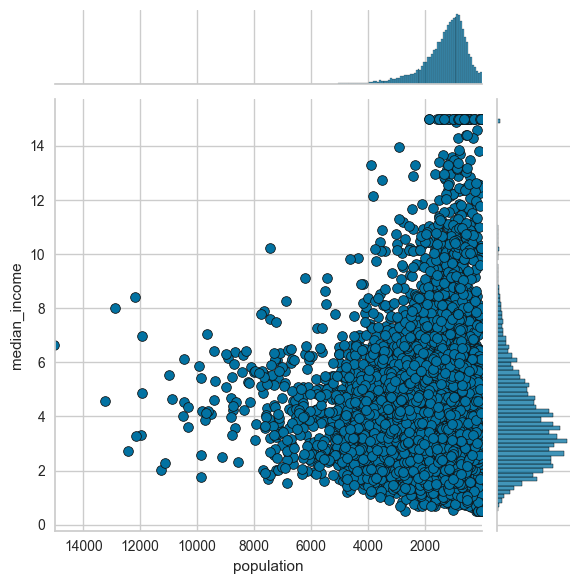

In [290]:
_ = sns.jointplot(data=housing, x='population', y='median_income', xlim=15_000, edgecolor='k')

Não parece existir uma relação entre população e renda.

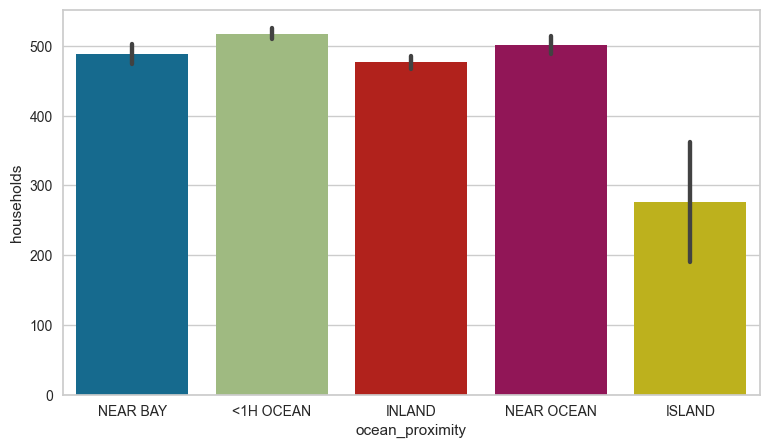

In [291]:
f = plt.figure(figsize=(9, 5))
_ = sns.barplot(data=housing, x='ocean_proximity', y='households')

## **Análise do valor mediano dos imóveis (alvo)**
#### Quais atributos se relacionam com o nosso alvo?
----------------------------------------------------------------

#### Será que a proximidade com o oceano influencia o valor do imóvel?

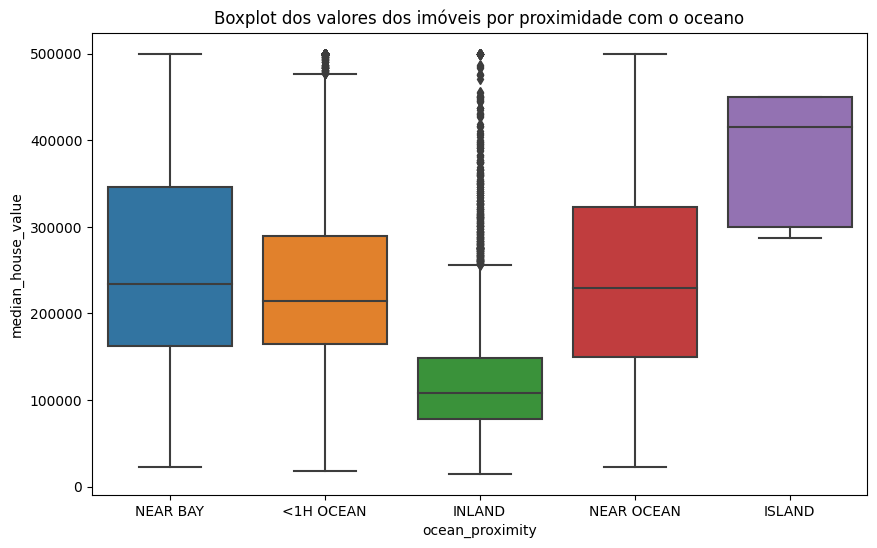

In [32]:
f = plt.figure(figsize=(10,6))
_ = sns.boxplot(data=housing, x='ocean_proximity', y='median_house_value')
_ = plt.title('Boxplot dos valores dos imóveis por proximidade com o oceano')

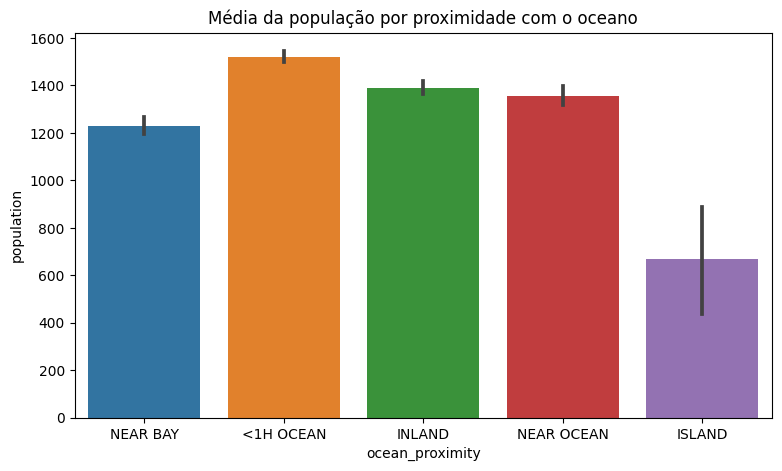

In [34]:
f = plt.figure(figsize=(9,5))
_ = sns.barplot(data=housing, x='ocean_proximity', y='population', estimator='mean')
_ = plt.title('Média da população por proximidade com o oceano')

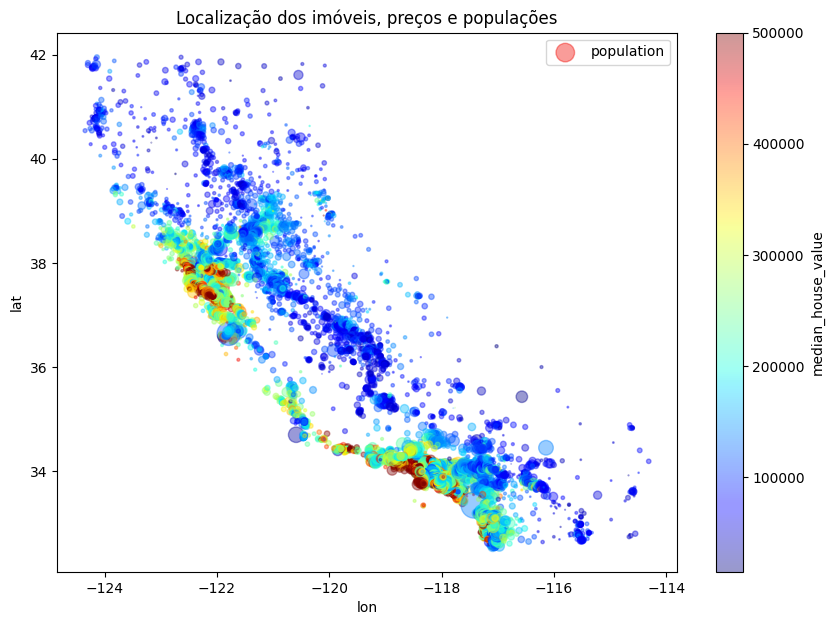

In [36]:
_ = housing.plot(kind="scatter", x="lon", y="lat", alpha=0.4,     
        s=housing["population"]/100, label="population", figsize=(10,7), 
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
_ = plt.title('Localização dos imóveis, preços e populações')
_ = plt.legend()

No litoral há mais pessoas e os imóveis são mais caros. Os centros ficam normalmente situados no litoral (como a cidade de Los Angeles) e nos centros há mais pessoas em busca de moradias, o que aumenta o valor delas.

#### Existe uma relação entre renda e o preço do imóvel?

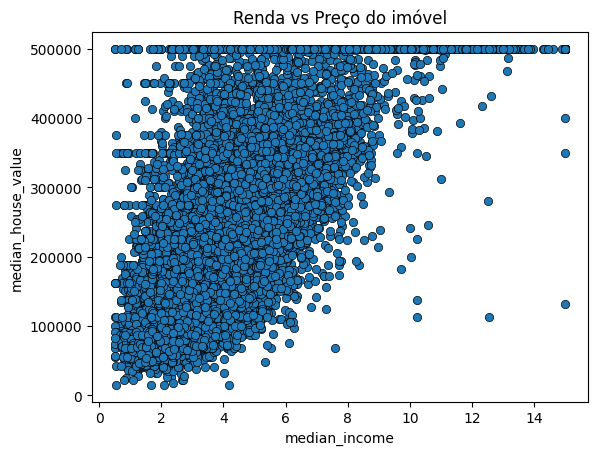

In [38]:
_ = sns.scatterplot(data=housing, x='median_income', y='median_house_value', edgecolor='k')
_ = plt.title('Renda vs Preço do imóvel')

Parece haver uma relação positiva entre as *features*. É possível observar também o limite em 500 mil no valor do imóvel apontado anteriormente.

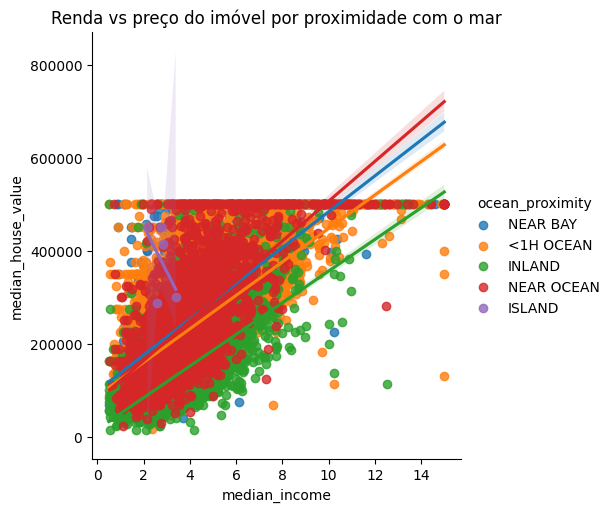

In [47]:
_ = sns.lmplot(data=housing, x='median_income', y='median_house_value', hue='ocean_proximity')
_ = plt.title('Renda vs preço do imóvel por proximidade com o mar')

Quanto mais perto do litoral, maior a inclinação da reta.

#### Existe uma relação entre a população e o valor do imóvel?

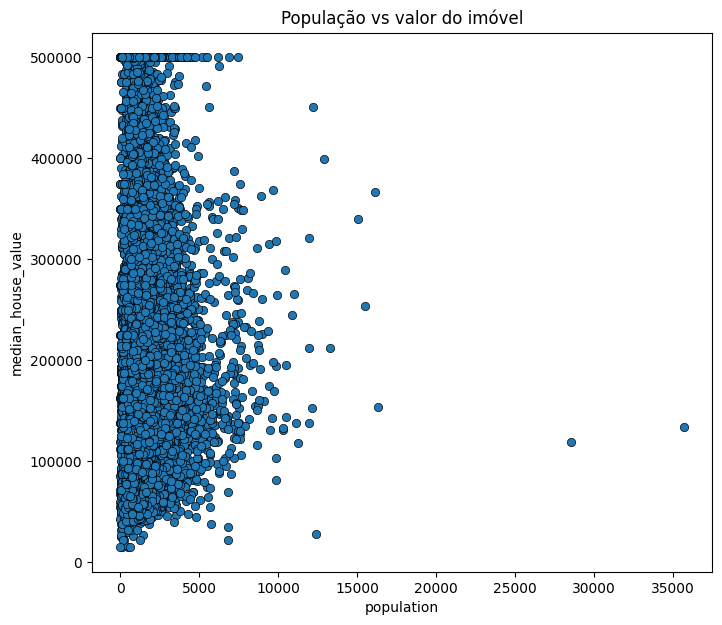

In [57]:
_ = plt.figure(figsize=(8,7))
_ = sns.scatterplot(data=housing, x='population', y='median_house_value', edgecolor='k')
_ = plt.title('População vs valor do imóvel')

Não parece existir uma relação entre população e o valor mediano.

## ***Feature Engineering***
#### Adicionando novas features: cidade mais próxima
----------------------------------------------------------------

Para melhorar a qualidade da informação, vamos transformar o conjunto (longitude, latitude) no nome da cidade mais próxima daquela localidade.

Para isso, baixei um arquivo .csv em que tem as coordenadas geográficas de cidades da Califórnia. Depois performei um *join* com as coordenadas dos imóveis e obtive as cidades mais próximas da localidade.

In [61]:
import geopandas as gpd
geometry_housing = gpd.points_from_xy(housing['lon'], housing['lat'])
points_housing = gpd.GeoDataFrame(housing, geometry=geometry_housing)

In [62]:
california_cities = pd.read_csv('cal_cities_lat_long.csv')
california_cities.head(5)

,Name,Latitude,Longitude
0,Adelanto,34.582769,-117.409214
1,Agoura Hills,34.153339,-118.761675
2,Alameda,37.765206,-122.241636
3,Albany,37.886869,-122.297747
4,Alhambra,34.095286,-118.127014


In [63]:
# lendo as coordenadas a partir de longitude (x) e latitude (y) e transformando em pontos.
geometry_cal = gpd.points_from_xy(california_cities['Longitude'], california_cities['Latitude'])

# criando um dataframe a partir desses pontos
points_cal = gpd.GeoDataFrame(california_cities, geometry=geometry_cal)

In [65]:
# performando o join para cruzar as coordenadas
joined_data = gpd.sjoin_nearest(points_housing,points_cal, how='left', distance_col='distance_nearest_city')
joined_data.head(5)

,lon,lat,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry,index_right,Name,Latitude,Longitude,distance_nearest_city
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000),34,Berkeley,37.871592,-122.272747,0.043566
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000),303,Piedmont,37.824372,-122.231636,0.037480
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000),303,Piedmont,37.824372,-122.231636,0.026958
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000),34,Berkeley,37.871592,-122.272747,0.031363
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000),34,Berkeley,37.871592,-122.272747,0.031363


In [68]:
joined_data = joined_data.rename(columns={'Name': 'nearest_city'})
joined_housing=joined_data.drop(columns=['geometry', 'index_right','Latitude','Longitude'])

In [69]:
nulls = get_na(joined_housing)
nulls

,lon,lat,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,nearest_city,distance_nearest_city
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,San Leandro,0.045239
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,San Leandro,0.028675
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,Oakland,0.025934
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,Alameda,0.015294
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,Hayward,0.028590
...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,Oxnard,0.013185
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,Oxnard,0.008064
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,Westlake Village,0.078180
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,Simi Valley,0.037598


In [81]:
if nulls.total_bedrooms.isna().all():
    print("-> Os valores nulos estão na coluna 'total_bedrooms'.")
if not nulls.nearest_city.isna().any():
    print("\n-> Não há valores nulos na coluna 'nearest city'.")

-> Os valores nulos estão na coluna 'total_bedrooms'.

-> Não há valores nulos na coluna 'nearest city'.


## **Explorando as novas variáveis**
#### Entendendo como se comportam nossas novas variáveis e explorando-as.
----------------------------------------------------------------

In [83]:
joined_housing.nearest_city.value_counts()

San Francisco    408
San Fernando     369
San Diego        353
San Jose         306
Los Angeles      290
                ... 
McFarland          4
Montague           4
Tulelake           2
Amador City        2
Dorris             1
Name: nearest_city, Length: 458, dtype: int64

In [84]:
groupby_nearest_city = joined_housing.groupby('nearest_city').agg({"median_income":'median', "median_house_value":'median'}).sort_values(by='median_income')
groupby_nearest_city

,median_income,median_house_value
nearest_city,,
Huron,1.50860,64700.0
Dorris,1.74000,44000.0
Calipatria,1.77270,50000.0
Vernon,1.81055,109800.0
Needles,1.82000,50000.0
...,...,...
Malibu,7.91840,500001.0
Palos Verdes Estates,8.08975,500001.0
Rancho Palos Verdes,8.28310,500001.0


In [85]:
groupby_nearest_city.corr()

,median_income,median_house_value
median_income,1.000000,0.833427
median_house_value,0.833427,1.000000


In [86]:
joined_housing.corr()['median_house_value']

lon                     -0.042146
lat                     -0.146742
housing_median_age       0.104800
total_rooms              0.134136
total_bedrooms           0.049087
population              -0.024952
households               0.065149
median_income            0.688345
median_house_value       1.000000
distance_nearest_city   -0.143746
Name: median_house_value, dtype: float64

In [87]:
copy = joined_housing.copy()

In [88]:
copy['rooms_per_household'] =  copy['total_rooms'] / copy['households']
copy['population_per_household'] = copy['population'] / copy['households']
copy['bedrooms_per_room'] = copy['total_bedrooms'] / copy['total_rooms']

In [89]:
copy.select_dtypes(include=np.number).corr()['median_house_value']

lon                        -0.042146
lat                        -0.146742
housing_median_age          0.104800
total_rooms                 0.134136
total_bedrooms              0.049087
population                 -0.024952
households                  0.065149
median_income               0.688345
median_house_value          1.000000
distance_nearest_city      -0.143746
rooms_per_household         0.153110
population_per_household   -0.023702
bedrooms_per_room          -0.257254
Name: median_house_value, dtype: float64

In [90]:
higher_price_cities = copy.groupby('nearest_city').median_house_value.mean().nlargest(30)
higher_price_cities.plot(kind='bar', backend='plotly')

<AxesSubplot:>

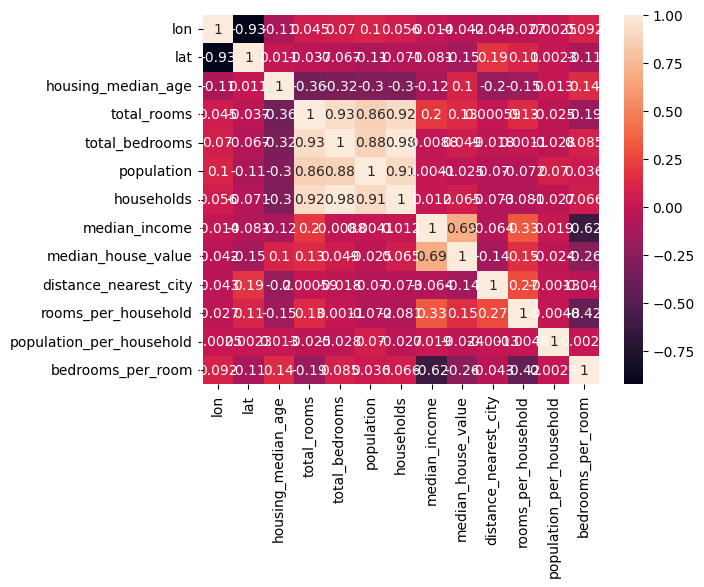

In [91]:
sns.heatmap(copy.corr(), annot=True)

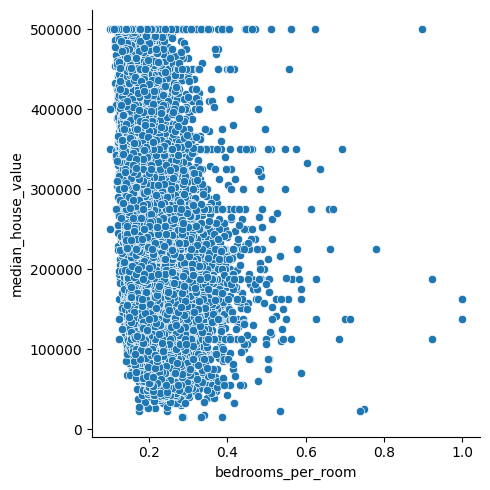

In [92]:
sns.relplot(data=copy, x='bedrooms_per_room', y='median_house_value')

## **Preparando para a modelagem**
#### Organização e limpeza dos dados
----------------------------------------------------------------

Vamos utilizar o objeto `Pipeline` do scikit-learn para aplicar preenchimento de *missing*, criar as novas variáveis, treinar e validar o modelo. O objetivo é deixar o código mais limpo e organizado.

In [94]:
data = housing.drop(columns='geometry')
X_data = data.drop(columns='median_house_value')
y = data['median_house_value']

In [95]:
cat_features = ["ocean_proximity", "nearest_city"]
numeric_features = list(set(X_data.columns.to_list()) - set(cat_features) - set(['lat', 'lon']))
print(f"Variáveis numéricas: {numeric_features}")
print(f"Variáveis categóricas: {cat_features}")

Variáveis numéricas: ['population', 'households', 'housing_median_age', 'total_rooms', 'median_income', 'total_bedrooms']
Variáveis categóricas: ['ocean_proximity', 'nearest_city']


In [101]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room
        california_cities = pd.read_csv('cal_cities_lat_long.csv')
        geometry_cal = gpd.points_from_xy(california_cities['Longitude'], california_cities['Latitude'])
        self.points_cal = gpd.GeoDataFrame(california_cities, geometry=geometry_cal)
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        def add_nearest_cities(data_points):
            joined_data = gpd.sjoin_nearest(data_points, self.points_cal, how='left', 
                                            distance_col='distance_nearest_city')
            joined_data = joined_data.rename(columns={'Name': 'nearest_city'})

            return joined_data

        geometry_housing = gpd.points_from_xy(X['lon'], X['lat'])
        points_housing = gpd.GeoDataFrame(X, geometry=geometry_housing)

        joined_data = add_nearest_cities(points_housing)
        X = joined_data.drop(columns=['lon','lat','geometry', 'index_right','Latitude','Longitude'])
        # removing generated duplicated locations (when there are more than one nearest city)
        X = X[~X.index.duplicated(keep='first')]  

        X['rooms_per_household'] = X.total_rooms / X.households
        X['population_per_household'] = X.population / X.households
        if self.add_bedrooms_per_room:
            X['bedrooms_per_room'] = X.total_bedrooms / X.total_rooms
            
        return X

In [106]:
num_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=6))
    ])

cat_transformer = Pipeline(
    steps=[('encoder', OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', cat_transformer, cat_features)
    ])

In [107]:
reg = Pipeline(
    steps=[('combiner', CombinedAttributesAdder(add_bedrooms_per_room=False)), ('preprocessor', preprocessor), ('classifier', LinearRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=42)

In [108]:
reg.fit(X_train, y_train)

Pipeline(steps=[('combiner',
                 CombinedAttributesAdder(add_bedrooms_per_room=False)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=6))]),
                                                  ['population', 'households',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'median_income',
                                                   'total_bedrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity',
                                                   'nearest_city'])])),
                ('classifier', LinearRegression())])

In [109]:
scores_t = cross_val_score(reg, X_train, y_train, cv=6, scoring='neg_mean_squared_error')
np.sqrt(-scores_t.mean())

54209.51625668515

<AxesSubplot:ylabel='median_house_value'>

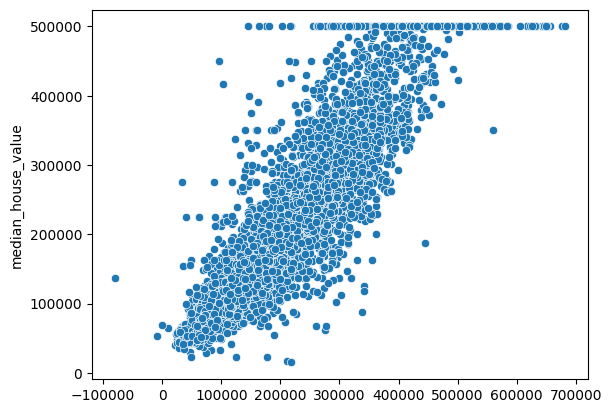

In [122]:
prediction = reg.predict(X_test)
sns.scatterplot(x=prediction, y = y_test)

In [115]:
import pickle
# saving the model
pickle.dump(reg, open('linear_reg_model.pkl', 'wb'))